# Bitcoin_xgboost API

## Description

This notebook demonstrates how to use the `bitcoin_utils.py` module, which provides utility functions to download and process cryptocurrency data. Specifically, this notebook covers:

- Downloading historical Bitcoin data from Yahoo Finance.
- Fetching real-time historical Bitcoin data from the CoinGecko API.
- Inspecting and comparing the resulting DataFrames to understand their structure.

This notebook corresponds to the documentation in [`bbitcoin.API.md`](./bitcoin.API.md).

## References

- [`temple.API.md`](./temple.API.md)
- [CoinGecko API](https://www.coingecko.com/en/api)
- [Yahoo Finance via yfinance](https://pypi.org/project/yfinance/)
- [Causify AI Notebook Guide](https://github.com/causify-ai/helpers/blob/master/docs/coding/all.jupyter_notebook.how_to_guide.md)

---



## loading the autoloaders

In [1]:
%load_ext autoreload
%autoreload 2

## 1. Import Dependencies

In [2]:
# Import necessary modules.
import pandas as pd
from bitcoin_utils import download_crypto_data, fetch_historical_bitcoin
import matplotlib.pyplot as plt

# Download Historical Bitcoin Data (Yahoo Finance)

In [8]:
btc_yf_data = download_crypto_data()
btc_yf_data.head()


INFO:bitcoin_utils:Starting download for BTC-USD from 2014-09-17
[*********************100%***********************]  1 of 1 completed
INFO:bitcoin_utils:Data for BTC-USD saved to BTC-USD-Historical.xlsx


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


## Visaualizing the data by yahoo finance

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])


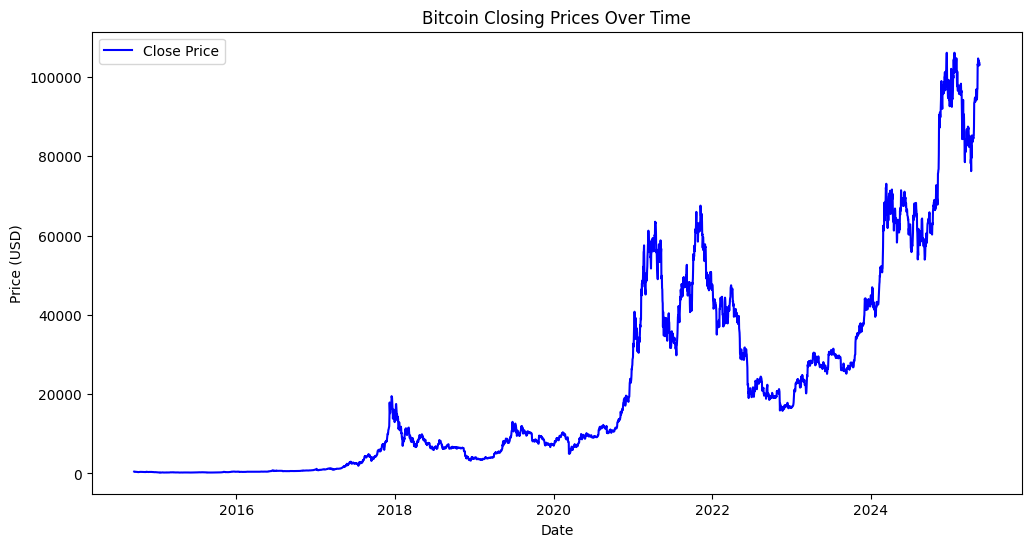

In [9]:
df = pd.read_excel("BTC-USD-Historical.xlsx", header=[0,1], index_col=0)

print(df.columns)

close_prices = df['Close']['BTC-USD']

close_prices.index = pd.to_datetime(close_prices.index)

plt.figure(figsize=(12,6))
plt.plot(close_prices.index, close_prices, label='Close Price', color='blue')
plt.title('Bitcoin Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

### Yahoo Finance Data

- **Column Structure**:  
  MultiIndex format, where each column is a tuple — for example:  
  `('Close', 'BTC-USD')`, `('Open', 'BTC-USD')`, etc.  
  This is standard when querying even a single ticker using `yfinance`.

- **Available Fields**:  
  - Open  
  - High  
  - Low  
  - Close  
  - Volume  
  - Adjusted Close (if requested)

- **Historical Depth**:  
  Almost **10 years of daily data** available (starting from 2014-09-17 for BTC-USD), making it highly suitable for long-term modeling, forecasting, and backtesting.

- **Use Case Fit**:  
  Ideal for time-series modeling, financial research, and applications requiring deep historical coverage.


# Fetch Real-Time Historical Data from CoinGecko API

In [10]:
# Fetch Bitcoin historical data for the last 365 days using CoinGecko API.

btc_cg_data = fetch_historical_bitcoin()
btc_cg_data.head()


INFO:bitcoin_utils:Fetching historical Bitcoin data for the past 365 days from CoinGecko API.
INFO:bitcoin_utils:Data successfully fetched from CoinGecko.
INFO:bitcoin_utils:Bitcoin data successfully transformed into DataFrame.


,open,high,low,close,volume
Date,,,,,
2024-05-18,67053.123265,67053.123265,67053.123265,67053.123265,2.539779e+10
2024-05-19,66912.618614,66912.618614,66912.618614,66912.618614,1.302549e+10
2024-05-20,66252.712596,66252.712596,66252.712596,66252.712596,9.072735e+09
2024-05-21,71430.297002,71430.297002,71430.297002,71430.297002,3.592348e+10
2024-05-22,70189.835818,70189.835818,70189.835818,70189.835818,4.110506e+10


## Visualizing the data that we got from coin geek api

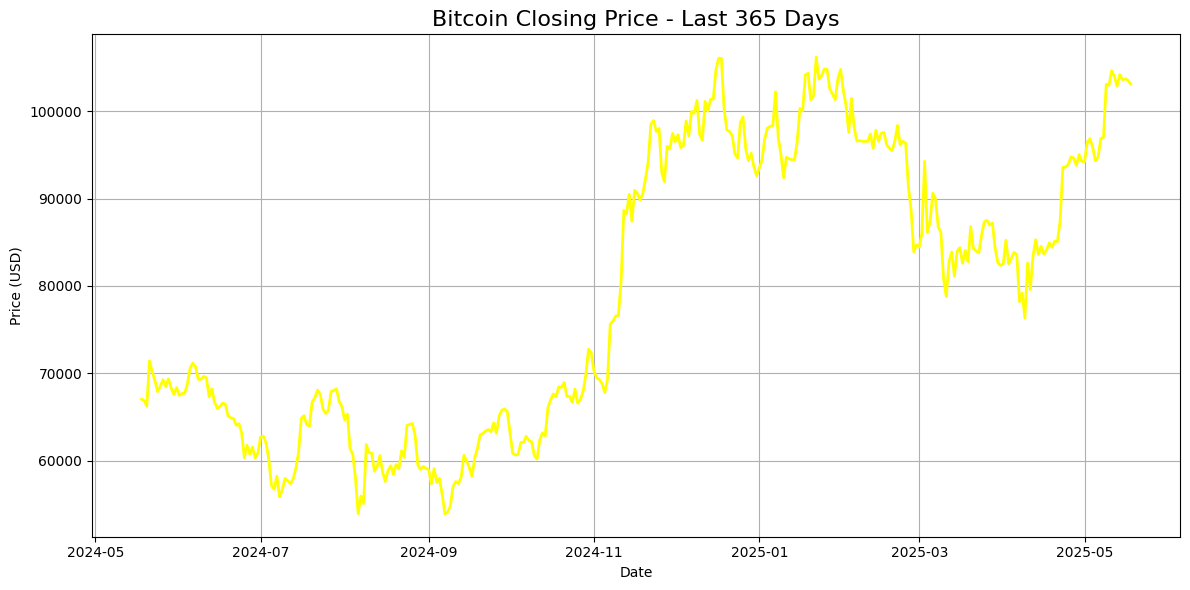

In [14]:


plt.figure(figsize=(12, 6))
plt.plot(btc_cg_data.index, btc_cg_data['close'], color='yellow', linewidth=2)
plt.title('Bitcoin Closing Price - Last 365 Days', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


### CoinGecko Data

- **Column Structure**:  
  Flat, lowercase column names:  
  `open`, `high`, `low`, `close`, `volume`

- **Available Fields**:  
  - Open  
  - High  
  - Low  
  - Close  
  - Volume  

- **Historical Depth**:  
  Free API provides **only the past 365 days** of data for daily intervals.  
  Suitable for short-term trend analysis or building lightweight real-time applications.

- **Use Case Fit**:  
  Best suited for real-time simulations, dashboards, and applications that only need recent price data.


# Compare Structures of Yahoo vs. CoinGecko Data

In [12]:
print("Yahoo Finance Data Columns:", btc_yf_data.columns.tolist())
print("CoinGecko Data Columns:", btc_cg_data.columns.tolist())


Yahoo Finance Data Columns: [('Close', 'BTC-USD'), ('High', 'BTC-USD'), ('Low', 'BTC-USD'), ('Open', 'BTC-USD'), ('Volume', 'BTC-USD')]
CoinGecko Data Columns: ['open', 'high', 'low', 'close', 'volume']


# Summary
- **Yahoo Finance** provides long-term, high-fidelity financial data with up to a decade of daily prices, structured in a robust format ideal for quantitative modeling and research.
- **CoinGecko API** is designed for lightweight, recent historical data access, offering simplicity and speed at the cost of depth — limited to the past 365 days for free daily data.
